In [150]:
#Import modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
#Load training dataset
df = pd.read_csv('./train.csv')

In [152]:
# Linear regression with a bunch of variables that could be relevant..

from sklearn.linear_model import LinearRegression
columns = ['LotArea', 'YrSold', 'BedroomAbvGr', 'YearBuilt', 'GarageCars']
X = df[columns].values
y = df.SalePrice.values
reg = LinearRegression().fit(X, y)

In [153]:
reg.score(X, y)

0.50521174508989408

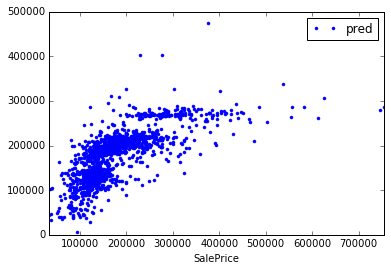

In [154]:
#Lets compare predictions and actual house prices directly
df['pred'] = reg.predict(df[columns].dropna())
df.plot(x = 'SalePrice', y = 'pred', marker = '.', linewidth = 0)

### Lasso

In [167]:
# A lasso regression will drop out some of the columns... 
# So we could include all numeric columns 

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

clf = linear_model.Lasso(alpha=10)

numeric = df.select_dtypes(include = ['int64', 'float64']).fillna(df.mean())
# numeric = StandardScaler.fit(numeric)
X = numeric.iloc[:, 1:-1].values
y = numeric.iloc[:, -1].values
clf.fit(X, y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

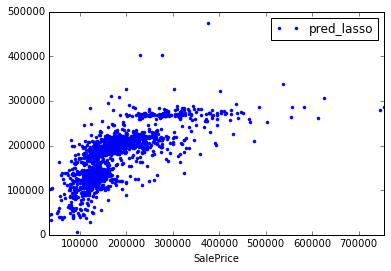

In [168]:
numeric['pred_lasso'] = clf.predict(numeric.iloc[:, 1:-1])
numeric.plot(x = 'SalePrice', y = 'pred_lasso', marker = '.', linewidth = 0)

In [169]:
# These are the coefficients. It is likely that some of them will be just zero.
clf.coef_

array([ -1.40200568e-03,   1.67557778e-02,   1.39372906e+00,
         0.00000000e+00,  -0.00000000e+00,   7.61555779e+02,
        -0.00000000e+00,  -4.35532315e-03,  -1.77186246e-02,
        -1.17591072e-02,  -2.43062270e-04,  -2.62653080e-03,
         2.38646240e-02,   3.20306872e-02,  -0.00000000e+00,
         4.64665537e-03,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.25615871e+04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -2.30518585e-01,   4.73708909e+04,   2.51473238e-01,
        -0.00000000e+00,  -3.75952181e-02,  -1.15882305e-02,
        -5.19109920e-03,   9.41415575e-03,  -4.10052518e-02,
        -2.32479374e-03,   0.00000000e+00,  -1.70163995e+01,
         5.37446055e-05])

In [170]:
#good columns
numeric.iloc[:, 1:].columns[clf.coef_ > 0]

Index([u'LotFrontage', u'LotArea', u'YearBuilt', u'1stFlrSF', u'2ndFlrSF',
       u'GrLivArea', u'BedroomAbvGr', u'GarageCars', u'GarageArea',
       u'ScreenPorch', u'SalePrice'],
      dtype='object')

In [171]:
#Unnecessary columns (Lasso)
numeric.iloc[:, 1:].columns[clf.coef_ == 0]

Index([u'OverallQual', u'OverallCond', u'YearRemodAdd', u'LowQualFinSF',
       u'BsmtFullBath', u'BsmtHalfBath', u'FullBath', u'HalfBath',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'WoodDeckSF',
       u'MoSold'],
      dtype='object')

In [178]:
#
test = pd.read_csv('./test.csv')
test = test[numeric.columns[:-3]].fillna(test.median())
test['SalePrice'] = clf.predict(test)

In [182]:
#Submission in format to kaggle
test[['Id', 'SalePrice']].to_csv('submission.csv', index = False)